In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_image, train_label), (test_image, test_label)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step

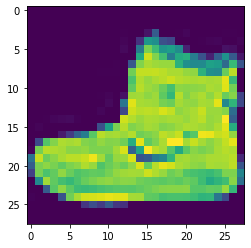

In [3]:
plt.imshow(train_image[0])

In [4]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
train_label[0], test_label[0]

(9, 9)

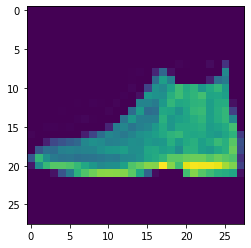

In [6]:
plt.imshow(test_image[0])

In [7]:
np.max(train_image), np.max(test_image)

(255, 255)

In [8]:
train_iamge = train_image/255
train_image1 = train_image[:50000,:]
test_image = train_image[50000:,:]

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])
model.fit(train_image, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.1807 - acc: 0.7221

In [11]:
model.evaluate(test_image, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 58.2022 - acc: 0.1023


[58.20224380493164, 0.1023000031709671]

In [12]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)
train_label_onehot1 = train_label_onehot[:50000,:]
test_label_onehot = train_label_onehot[50000:,:]

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc'])
model.fit(train_image, train_label_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 3.7090 - acc: 0.7111

In [15]:
predict = model.predict(test_image)

In [16]:
predict.shape

(10000, 10)

In [17]:
np.argmax(predict, axis=1)

array([9, 2, 1, ..., 3, 0, 5], dtype=int64)

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc'])
history = model.fit(train_image1, train_label_onehot1, epochs=10, validation_data=(test_image,test_label_onehot))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 5.0280 - acc: 0.1052 - val_loss: 2.2848 - val_acc: 0.1105

In [20]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

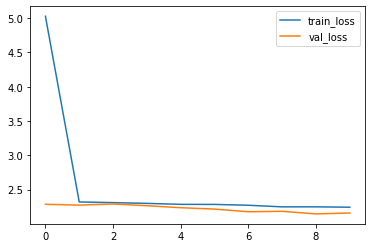

In [21]:
plt.plot(history.epoch, history.history.get('loss'), label='train_loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()